In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import csv
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import shuffle
from sklearn import svm,metrics
import itertools

In [35]:
csv_path = "./datasets/data.csv"
data = pd.read_csv(csv_path)
data.head(10)

,Year,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223
5,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,-4.69088,2.49578,-3.02468
6,2001,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,8.25435,-0.43743,5.66265
7,2001,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,1.18189,1.46625,-6.34226
8,2001,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,7.43847,-0.03578,1.66534
9,2007,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,2.00002,-1.87785,9.85499


# PCA

In [38]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values
print("X ", X.shape, ", y ", y.shape)

X  (515345, 12) , y  (515345,)


In [61]:
pca = PCA(n_components=3).fit(X)
X_pca = pca.transform(X)
X_pca

array([[ 23.02374297, -65.14637084,   0.75597638],
       [ 21.73600092, -61.12642022,   3.73795084],
       [ 33.40088899, -46.21413978,   8.35517783],
       ...,
       [ 10.36090731,  43.39468727, -23.2743042 ],
       [ 31.82881558,  12.62093597, -10.74665547],
       [ 60.17038382, -16.0633888 ,  -7.94289992]])

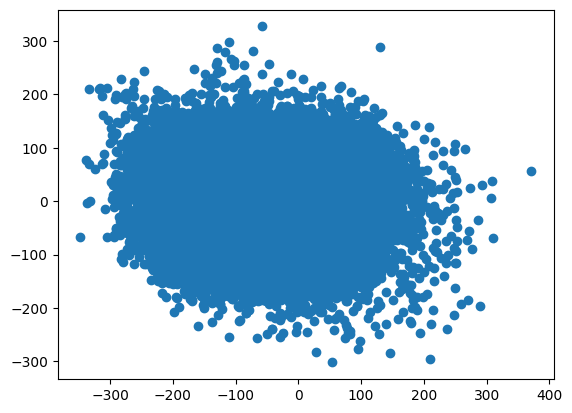

In [62]:
# 可视化
fig,s = plt.subplots()      #fig创建画布
s.scatter(X_pca[:,0],X_pca[:,1])
plt.show()

In [63]:
X_pca[y==2001,0]

array([ 23.02374297,  21.73600092,  33.40088899, ..., -18.72964666,
        66.64020485,  16.85917482])

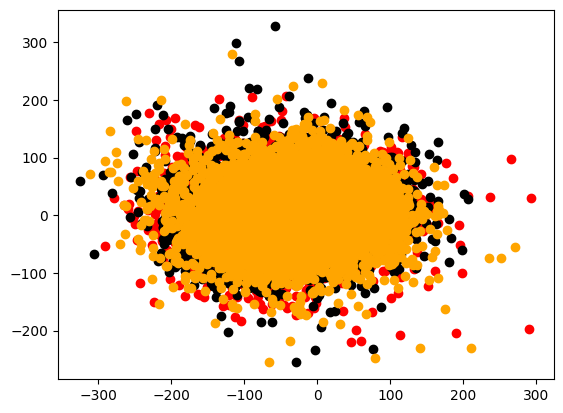

In [64]:
for i in range(3):
    color = ['red','black','orange']
    plt.scatter(X_pca[y==i+2000,0],X_pca[y==i+2000,1],c=color[i])
plt.show()

# SVC

In [66]:
data = shuffle(data)
df_train, df_test = train_test_split(data, test_size=0.3)

In [67]:
X_train = df_train.iloc[:,1:].values 
y_train = df_train.iloc[:,0].values
print("X_train ", X_train.shape, ", y_train ", y_train.shape)

X_train  (360741, 12) , y_train  (360741,)


In [69]:
clf = svm.SVC(kernel='rbf',C=10,gamma=5);
clf.fit(X_train, y_train)

#### SVM document
##### The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples.

In [ ]:
tst = df_test
X_test = tst.iloc[:,1:].values 
y_test = tst.iloc[:,0].values
expected = y_test
predicted = clf.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
cnf_matrix = metrics.confusion_matrix(expected, predicted)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
labels = sorted(df_test.label.unique())
plot_confusion_matrix(cnf_matrix, classes=["{:02d}'s".format(label%100) for label in labels],
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["{:02d}'s".format(label%100) for label in labels], normalize=True,
                      title='Normalized')

plt.show()